### Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
import isodate

#### Creating variables for API Key and Channel Ids for WebScraping

In [2]:
api_key = '***************************'

channel_ids = ['UCy--PYvwBwAeuYaR8JLmrfg',# Microsoft Power BI
               'UCWGrtxO6JrPSDUcgp3Qm_Gw', #Tableu
               'UCqDEwoclB5Btepxr6O9EkAQ', #qlik
               'UCJ5UyIAa5nEGksjcdp43Ixw' #google data studio
              ]

youtube = build('youtube','v3',developerKey=api_key)

### Part -1 Comparing 4 Data Visualization tool youtube channel Views, Videos, Subscriber count

#### Function to get channel Statistics

In [3]:
def get_channel_stat(youtube,channel_ids):
    all_data = []
    request = youtube.channels().list(
                part = 'snippet,contentDetails,statistics',
                id =','.join(channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):    
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                   )

        all_data.append(data)
        
    return all_data
    

In [4]:
channel_statistics = get_channel_stat(youtube,channel_ids)

In [5]:
channel_data = pd.DataFrame(channel_statistics)

In [6]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Qlik,39300,2699438,762,UUqDEwoclB5Btepxr6O9EkAQ
1,Google Analytics,466000,53573271,517,UUJ5UyIAa5nEGksjcdp43Ixw
2,Tableau,112000,67660592,3655,UUWGrtxO6JrPSDUcgp3Qm_Gw
3,Microsoft Power BI,436000,16666750,518,UUy--PYvwBwAeuYaR8JLmrfg


In [7]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
Playlist_id     object
dtype: object

In [8]:
# Converting subscribers,views and total_videos object data types into numeric data types.
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
Playlist_id     object
dtype: object

### Visualizing the Channel_data

##### 1.Who has the highest numbers of subscribers

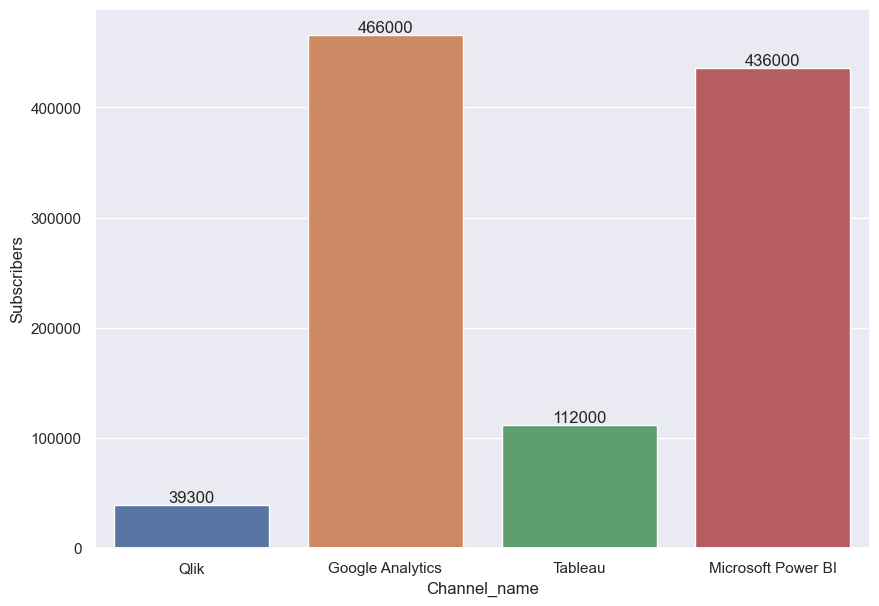

In [9]:
# Setting up the plot background for better visualization
sns.set(rc={'figure.figsize':(10,7)})

# Ploting the subscriber
ax = sns.barplot(x='Channel_name', y='Subscribers',data=channel_data,hue='Channel_name')

# Adding data label on the barplot respectively
for i in ax.containers:
    ax.bar_label(i,)

##### 2. Who has posted highest numbers of videos

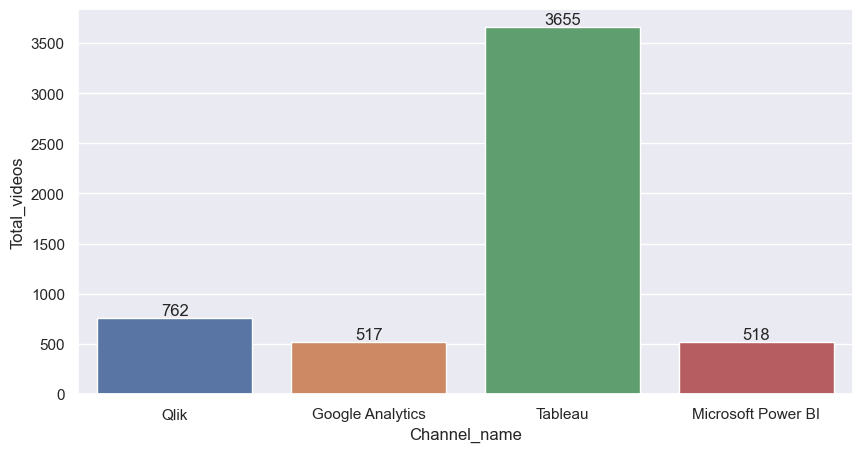

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='Channel_name',y='Total_videos',data=channel_data,hue='Channel_name')

# Adding data label on the barplot respectively
for i in ax.containers:
    ax.bar_label(i,)

##### 3. Who's videos viewed the most?

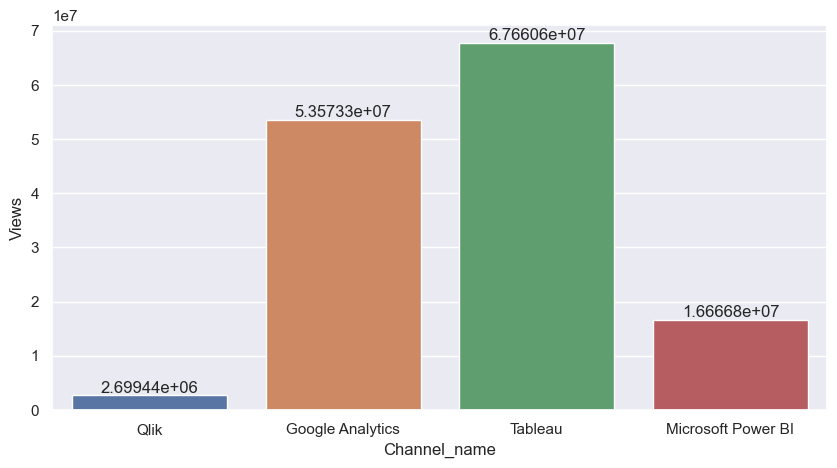

In [11]:
ax = sns.barplot(x='Channel_name',y='Views', data = channel_data,hue='Channel_name')

# Adding data label on the barplot respectively
for i in ax.containers:
    ax.bar_label(i,)

# 

### Part - 2 Analysing only Microsoft Power BI Channel.

In [12]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Microsoft Power BI','Playlist_id'].iloc[0]

In [13]:
playlist_id

'UUy--PYvwBwAeuYaR8JLmrfg'

#### Function to get Microsoft Power BI Channel videos id

In [14]:
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
              part = 'contentDetails',
              playlistId = playlist_id,
              maxResults = 50)
    response = request.execute()

    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part ='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')
                
    return video_ids

In [15]:
 video_ids = get_video_ids(youtube, playlist_id)

#### Function to get video details

In [16]:
def get_video_details(youtube,video_ids):
    
    all_video_stat = []
    
    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(
                    part = 'snippet,contentDetails,statistics',
                    id = ','.join(video_ids[i:i+50]))
        response = request.execute()
    
        for video in response['items']:
            video_stats = dict(video_id = video['id'],
                               title=video['snippet']['title'],
                               published_date = video['snippet']['publishedAt'],
                               views = video['statistics']['viewCount'],
                               likes = video['statistics']['likeCount'],
                               duration = video['contentDetails']['duration'],
                               definition = video['contentDetails']['definition']
                              )

            all_video_stat.append(video_stats)
    
    return all_video_stat

In [17]:
video_detail = get_video_details(youtube,video_ids)

In [18]:
video_data = pd.DataFrame(video_detail)
video_data

,video_id,title,published_date,views,likes,duration,definition
0,vnfDAkI9HgI,Power BI Update - July 2024,2024-07-11T16:41:09Z,38449,544,PT20M42S,hd
1,fbw09nHOm-c,Power BI Update - June 2024,2024-06-12T15:54:19Z,79293,668,PT12M21S,hd
2,k5EEdq6y_jo,Power BI Update - May 2024,2024-05-21T16:00:42Z,58337,631,PT12M16S,hd
3,suK7R8I1jps,How to pass Exam DP-600: Implementing Analytic...,2024-05-09T01:05:49Z,9581,116,PT2H2S,hd
4,Ub9tGT0Bt-c,How to pass Exam DP-600: Implementing Analytic...,2024-05-08T16:04:31Z,7714,150,PT1H59M59S,hd
...,...,...,...,...,...,...,...
513,sI3yRjdnJ7w,Power BI Desktop Update - November 2017,2017-11-08T21:19:55Z,59323,291,PT34M2S,hd
514,9aXPfyJahug,"What is new and exciting in PowerApps, Flow an...",2017-10-26T17:38:10Z,15228,112,PT30M5S,hd
515,NbsLRDMWNRI,Microsoft Power BI Embedded,2017-10-03T07:17:55Z,31808,127,PT2M20S,hd
516,cfogi9vGQLc,DAX '50': DAX for the rest of us!,2017-06-12T23:33:46Z,24157,234,PT48M59S,hd


### Data Preprocessing

In [19]:
# Checking if any null values are there in video_data data frame.
video_data.isnull().sum()

video_id          0
title             0
published_date    0
views             0
likes             0
duration          0
definition        0
dtype: int64

In [20]:
# Checking data types in the video_data data frame
video_data.dtypes

video_id          object
title             object
published_date    object
views             object
likes             object
duration          object
definition        object
dtype: object

##### Converting data types

In [21]:
video_data['published_date'] = pd.to_datetime(video_data['published_date']).dt.date
video_data['views'] = pd.to_numeric(video_data['views'])
video_data['likes'] = pd.to_numeric(video_data['likes'])

#### Converting youtube duration into seconds

In [22]:
video_data['duration_in_seconds'] = video_data['duration'].apply(lambda x : int(isodate.parse_duration(x).total_seconds()))

In [23]:
video_data

,video_id,title,published_date,views,likes,duration,definition,duration_in_seconds
0,vnfDAkI9HgI,Power BI Update - July 2024,2024-07-11,38449,544,PT20M42S,hd,1242
1,fbw09nHOm-c,Power BI Update - June 2024,2024-06-12,79293,668,PT12M21S,hd,741
2,k5EEdq6y_jo,Power BI Update - May 2024,2024-05-21,58337,631,PT12M16S,hd,736
3,suK7R8I1jps,How to pass Exam DP-600: Implementing Analytic...,2024-05-09,9581,116,PT2H2S,hd,7202
4,Ub9tGT0Bt-c,How to pass Exam DP-600: Implementing Analytic...,2024-05-08,7714,150,PT1H59M59S,hd,7199
...,...,...,...,...,...,...,...,...
513,sI3yRjdnJ7w,Power BI Desktop Update - November 2017,2017-11-08,59323,291,PT34M2S,hd,2042
514,9aXPfyJahug,"What is new and exciting in PowerApps, Flow an...",2017-10-26,15228,112,PT30M5S,hd,1805
515,NbsLRDMWNRI,Microsoft Power BI Embedded,2017-10-03,31808,127,PT2M20S,hd,140
516,cfogi9vGQLc,DAX '50': DAX for the rest of us!,2017-06-12,24157,234,PT48M59S,hd,2939


##### Extracting Day name and month name form published_date

In [24]:
video_data['day_name'] = pd.to_datetime(video_data['published_date']).dt.strftime('%A')
video_data['month'] = pd.to_datetime(video_data['published_date']).dt.strftime('%B')

In [25]:
# Checking the data types of video_data data frame
video_data.dtypes

video_id               object
title                  object
published_date         object
views                   int64
likes                   int64
duration               object
definition             object
duration_in_seconds     int64
day_name               object
month                  object
dtype: object

### Exploratory Data Analysis

#### 1. Top 10 Videos by views

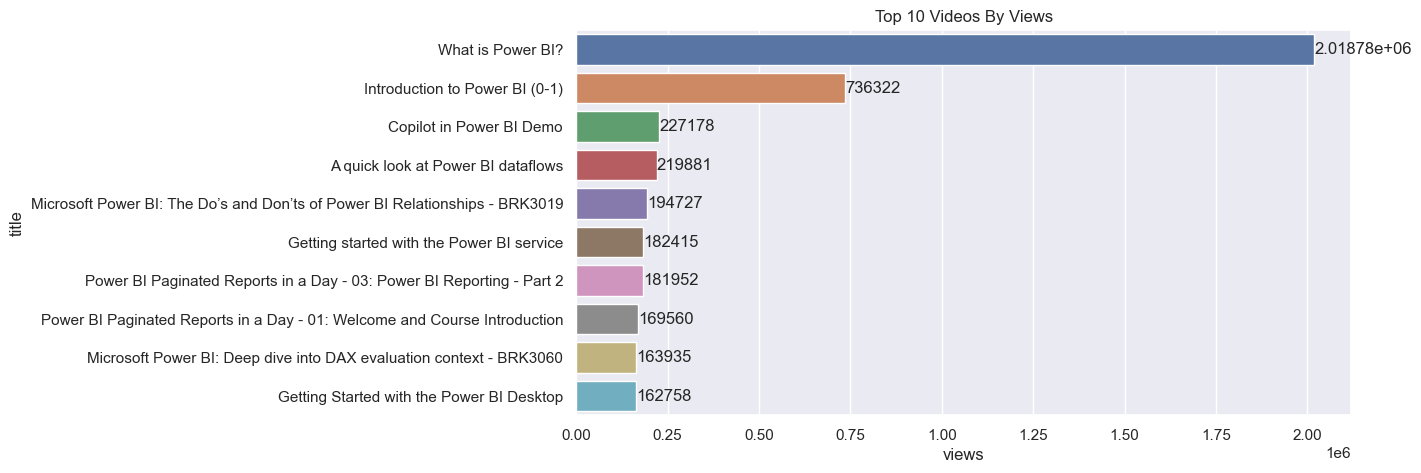

In [26]:
plt.title('Top 10 Videos By Views')
# Ploting top 10 videos by views
ax1 =sns.barplot(x='views',y='title',data=video_data.sort_values(by='views',ascending=False).head(10),hue='title')

# Addind data label on the bar plot
for i in ax1.containers:
    ax1.bar_label(i,)

#### Worst Performing videos by views

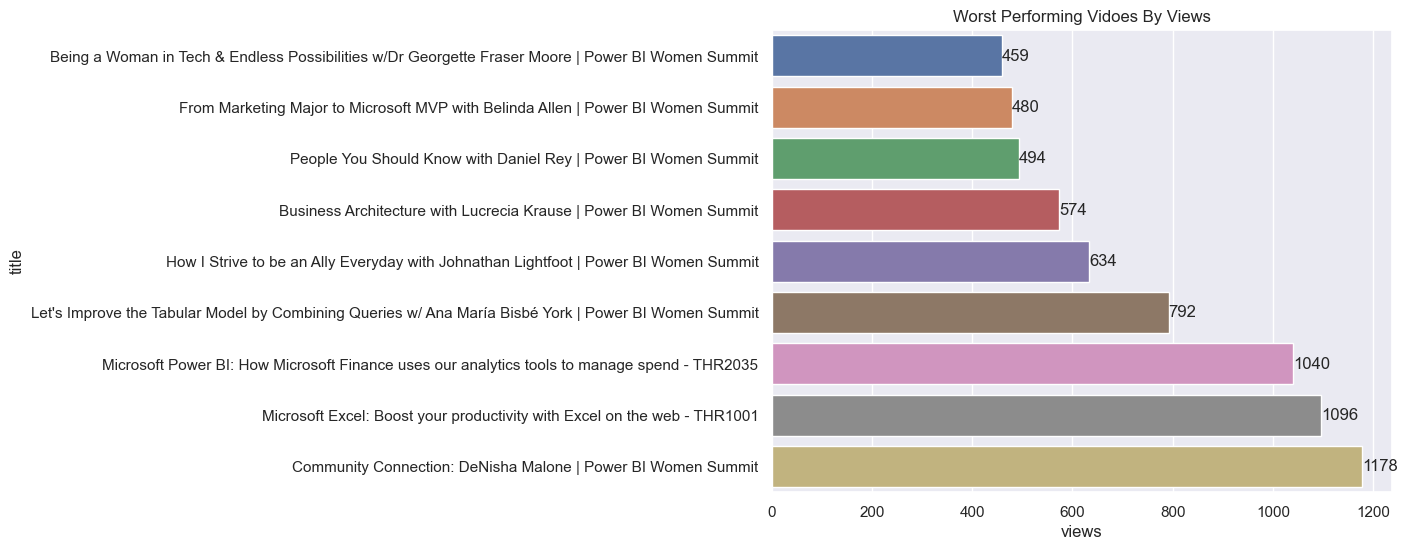

In [27]:
sns.set(rc={'figure.figsize':(8,6)})
plt.title('Worst Performing Vidoes By Views')
# Ploting worst performing videos by views
ax2 = sns.barplot(x='views',y='title',data=video_data.sort_values(by='views',ascending=True)[0:9],hue='title')

# Adding data label on the bar plot
for i in ax2.containers:
    ax2.bar_label(i,)


#### Views Distribution 

<Axes: title={'center': 'Views Distribution'}, ylabel='views'>

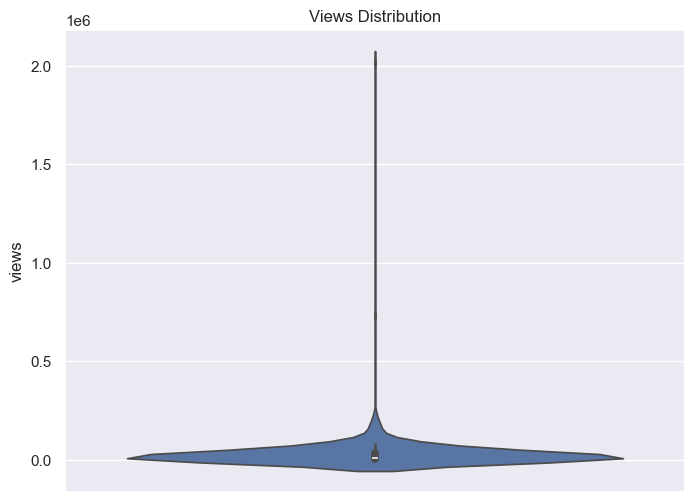

In [28]:
plt.title('Views Distribution')
sns.violinplot(video_data['views'])

#### Views vs Likes

<Axes: title={'center': 'Video Views vs Likes'}, xlabel='likes', ylabel='views'>

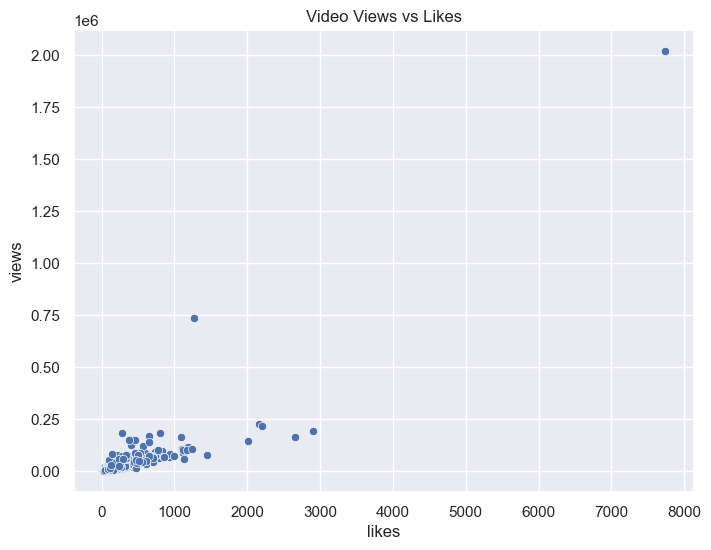

In [29]:
plt.title('Video Views vs Likes')
sns.scatterplot(data = video_data,x ='likes',y='views')

#### Video Duration

<Axes: title={'center': 'Video Duration'}, xlabel='duration_in_seconds', ylabel='Count'>

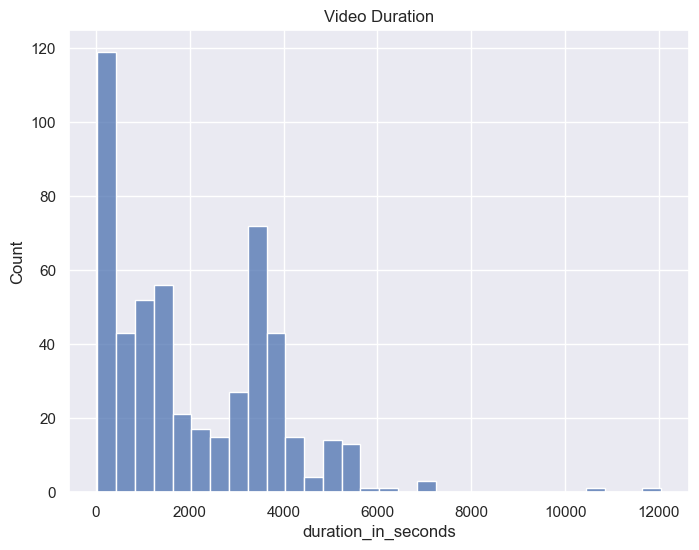

In [30]:
plt.title('Video Duration')
sns.histplot(data=video_data,x='duration_in_seconds',bins=30)

#### Videos Upload per day

In [31]:
video_data.head(2)

,video_id,title,published_date,views,likes,duration,definition,duration_in_seconds,day_name,month
0,vnfDAkI9HgI,Power BI Update - July 2024,2024-07-11,38449,544,PT20M42S,hd,1242,Thursday,July
1,fbw09nHOm-c,Power BI Update - June 2024,2024-06-12,79293,668,PT12M21S,hd,741,Wednesday,June


In [32]:
video_upload_per_day = video_data.groupby('day_name',as_index=False).size()

In [33]:
day_sort_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
video_upload_per_day.index = pd.CategoricalIndex(video_upload_per_day['day_name'],categories=day_sort_order,ordered=True)
video_upload_per_day = video_upload_per_day.sort_index()
video_upload_per_day

,day_name,size
day_name,,
Monday,Monday,58
Tuesday,Tuesday,153
Wednesday,Wednesday,158
Thursday,Thursday,91
Friday,Friday,55
Saturday,Saturday,3


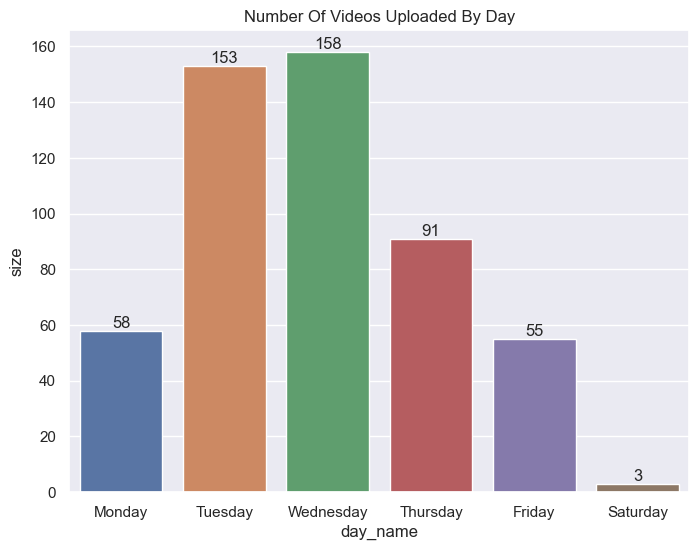

In [34]:
# Ploting the  day wise uploded video
plt.title('Number Of Videos Uploaded By Day')
ax4 = sns.barplot(x='day_name',y = 'size',data=video_upload_per_day,hue='day_name')

# Adding data label on the bar plot
for i in ax4.containers:
    ax4.bar_label(i,)    

#### Videos upload per month

In [35]:
video_upload_per_month = video_data.groupby('month',as_index=False).size()
video_upload_per_month

,month,size
0,April,32
1,August,15
2,December,22
3,February,46
4,January,36
5,July,20
6,June,124
7,March,54
8,May,50
9,November,65


In [36]:
#video_upload_per_month'
month_sort = ['January','February','March','April','May','June',
              'July','August','September','October','November','December']

video_upload_per_month.index = pd.CategoricalIndex(video_upload_per_month['month'],categories=month_sort,ordered=True)
video_upload_per_month = video_upload_per_month.sort_index()
video_upload_per_month

,month,size
month,,
January,January,36
February,February,46
March,March,54
April,April,32
May,May,50
June,June,124
July,July,20
August,August,15
September,September,27


C:\Users\gst\AppData\Local\Temp\ipykernel_8812\762465789.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax5.set_xticklabels(ax5.get_xticklabels(),rotation = 90)


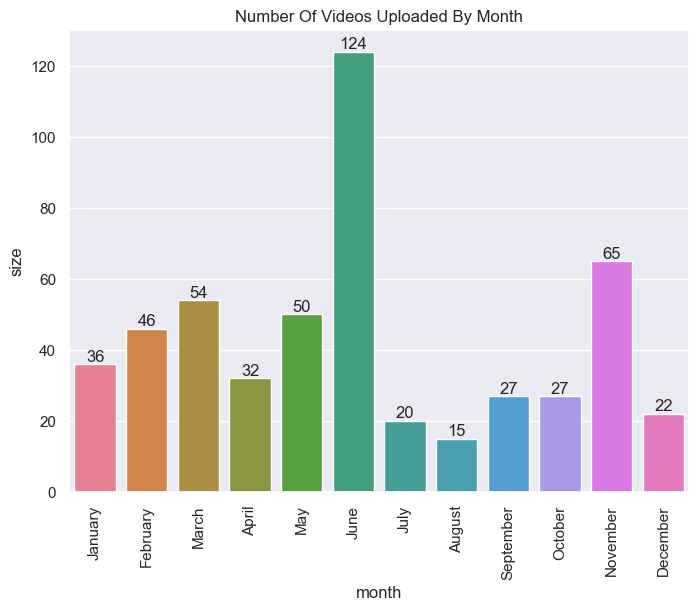

In [37]:
plt.title('Number Of Videos Uploaded By Month')
ax5 = sns.barplot(x='month',y='size',data=video_upload_per_month,hue='month')
plot = ax5.set_xticklabels(ax5.get_xticklabels(),rotation = 90)

for i in ax5.containers:
    ax5.bar_label(i,)

#### Exporting the Data Frame

In [38]:
Microsoft_Power_BI = video_data.to_csv('Videos_Data_Details(Microsoft Power BI).csv')

### --- Web Scraping and Explorarotry Data Analysis Completed